# Comp255 Assignment 1

In [44]:
#import packages

import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Data Visualisation - task 1 

In [115]:
# read and visualise the raw data 

def data_visulization():
    # read dataset file
    df = pd.read_csv('dataset_1.txt', sep=',', header=None)
    for i in range (1,14):
        df_activity = df[df[24] == i].values
        # Plot the accelerometer data
        print("Accelerometer for activity" + str(i))
        plt.plot(df_activity[500:1500, 0:3])
        plt.show()
        #plot the gyroscope data
        print("Gyroscope for activity" + str(i))
        plt.plot(df_activity[500:1500, 3:6])
        plt.show()

Accelerometer for activity1


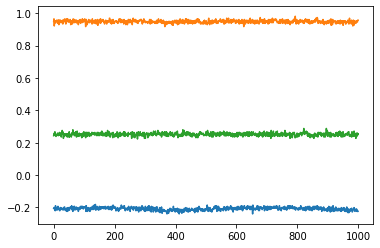

Gyroscope for activity1


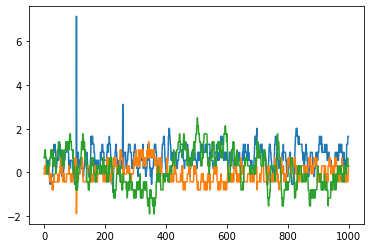

Accelerometer for activity2


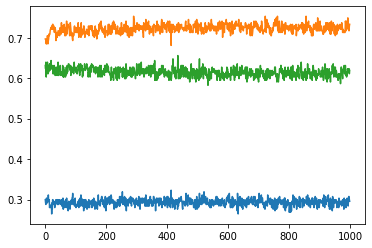

Gyroscope for activity2


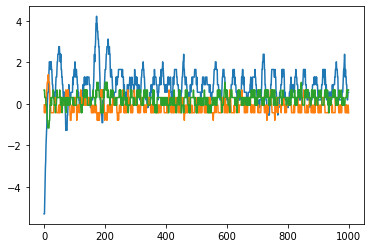

Accelerometer for activity3


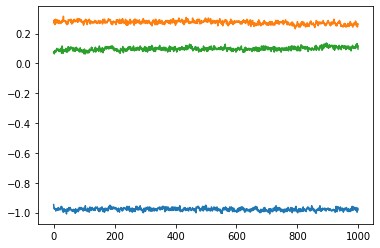

Gyroscope for activity3


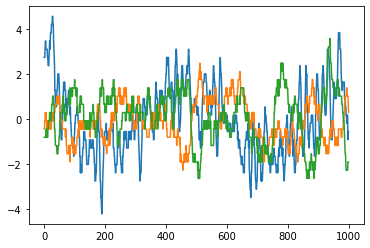

Accelerometer for activity4


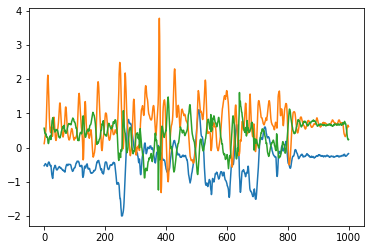

Gyroscope for activity4


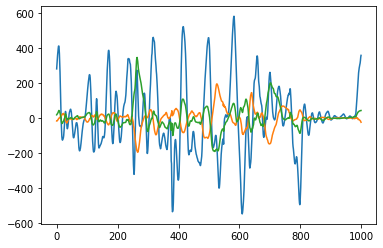

Accelerometer for activity5


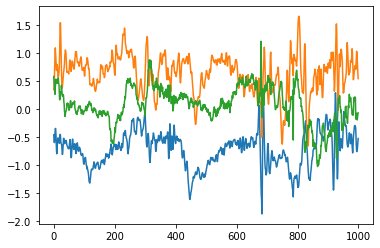

Gyroscope for activity5


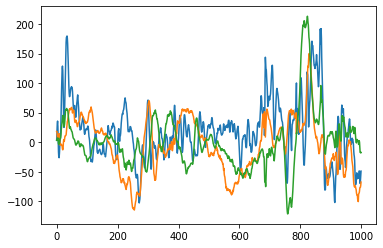

Accelerometer for activity6


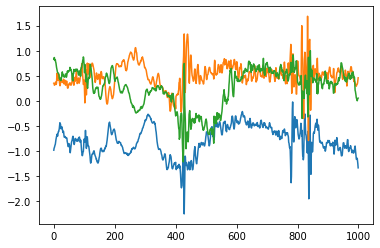

Gyroscope for activity6


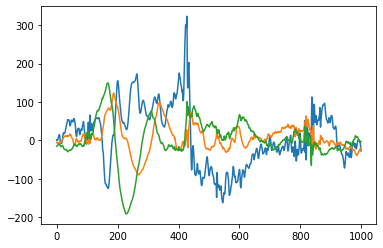

Accelerometer for activity7


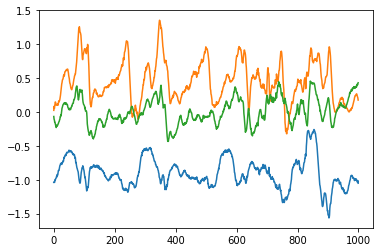

Gyroscope for activity7


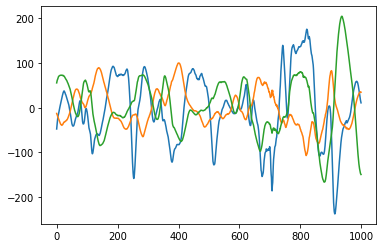

Accelerometer for activity8


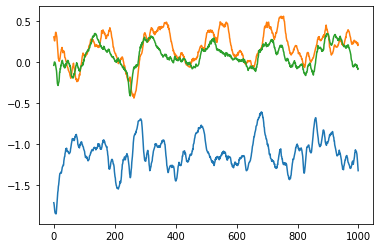

Gyroscope for activity8


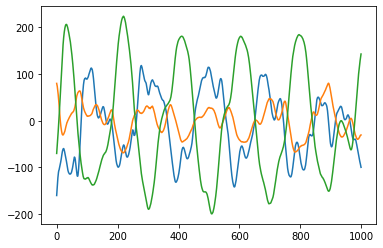

Accelerometer for activity9


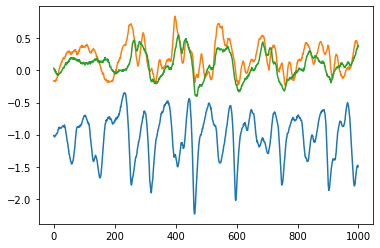

Gyroscope for activity9


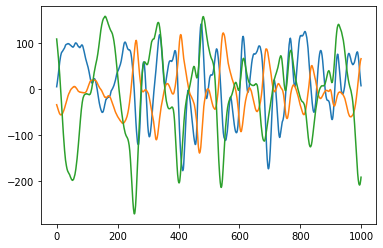

Accelerometer for activity10


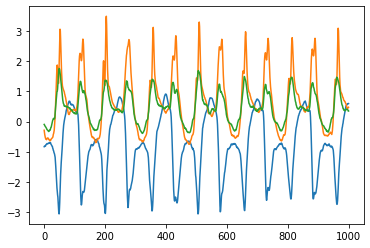

Gyroscope for activity10


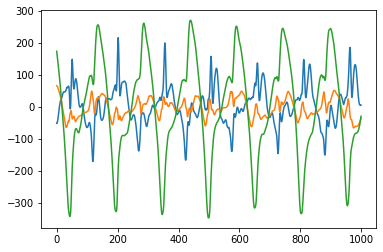

Accelerometer for activity11


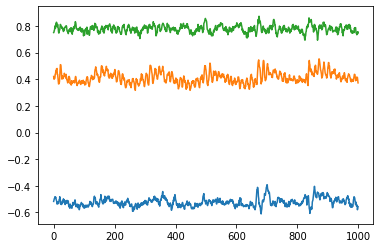

Gyroscope for activity11


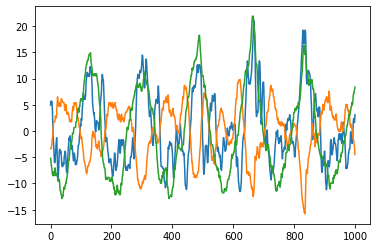

Accelerometer for activity12


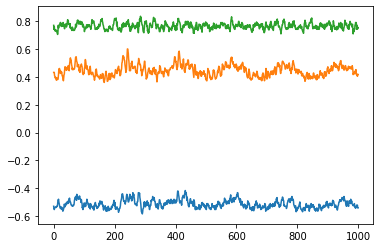

Gyroscope for activity12


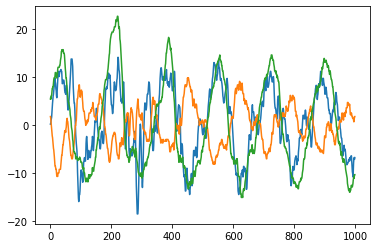

Accelerometer for activity13


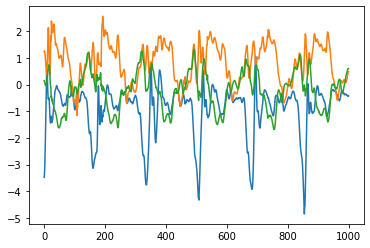

Gyroscope for activity13


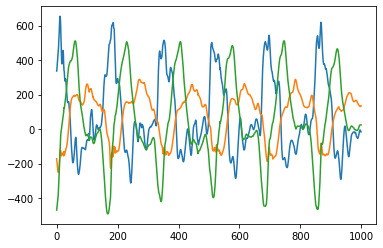

In [116]:
#function call
data_visulization()

In [119]:
# apply sensoring and filtering a visulise the same data 

def noise_removing():
    # Butterworth low-pass filter. 
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    df = pd.read_csv('dataset_1.txt', sep=',', header=None)
    for i in range(1,14):
        df_activity = df[df[24] == i].values
    
        for j in range(3):
            df_activity[:,j] = signal.lfilter(b, a, df_activity[:, j])
        # Plot the accelerometer data
        print("Accelerometer for activity" + str (i))
        plt.plot(df_activity[500:1500, 0:3])
        plt.show()

        for j in range(3,6):
            df_activity[:,j] = signal.lfilter(b, a, df_activity[:, j])
        #plot the gyroscope data
        print("Gyroscope for activity" + str(i))
        plt.plot(df_activity[500:1500, 3:6])
        plt.show()


Accelerometer for activity1


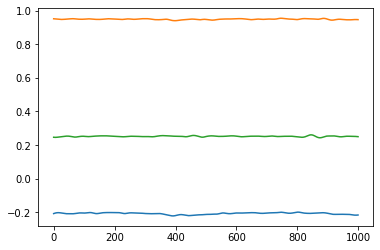

Gyroscope for activity1


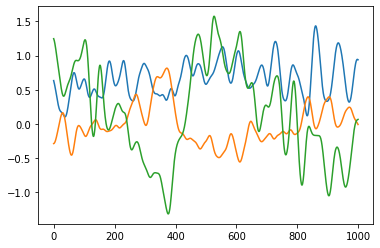

Accelerometer for activity2


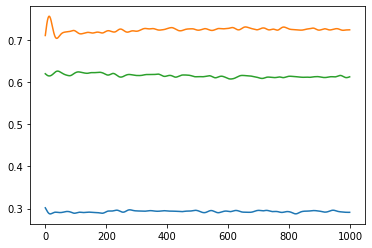

Gyroscope for activity2


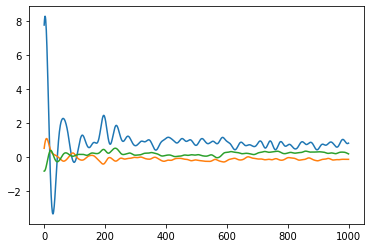

Accelerometer for activity3


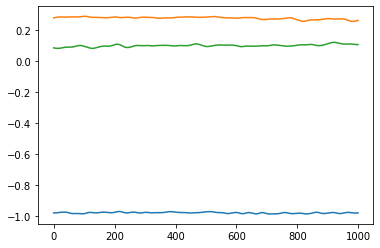

Gyroscope for activity3


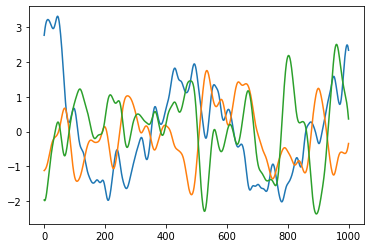

Accelerometer for activity4


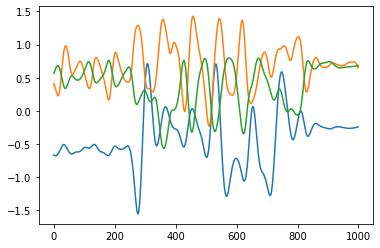

Gyroscope for activity4


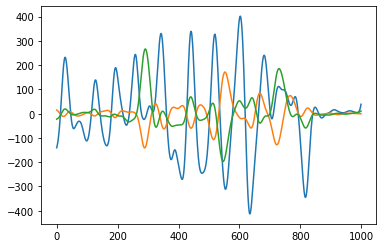

Accelerometer for activity5


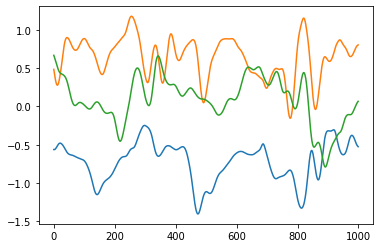

Gyroscope for activity5


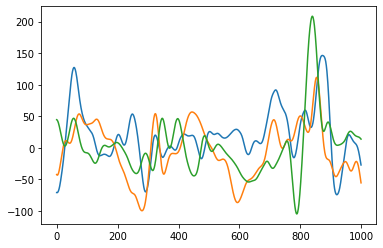

Accelerometer for activity6


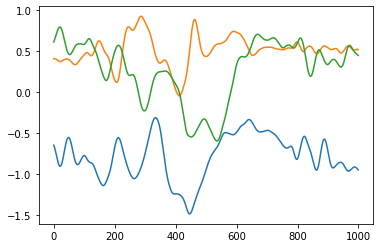

Gyroscope for activity6


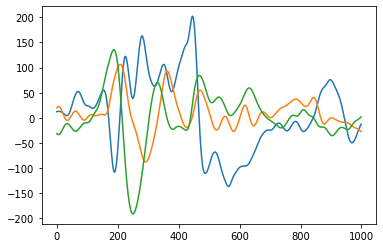

Accelerometer for activity7


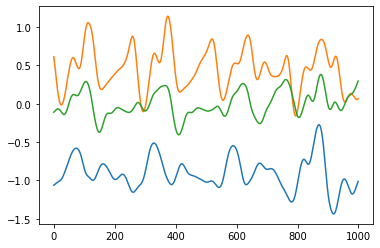

Gyroscope for activity7


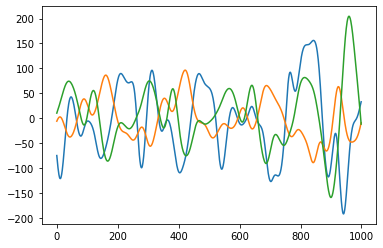

Accelerometer for activity8


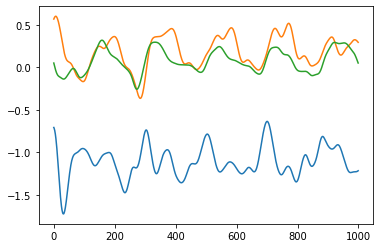

Gyroscope for activity8


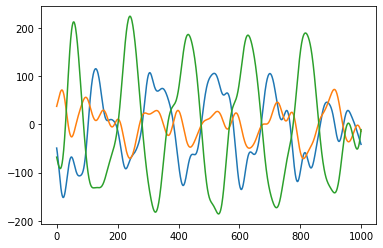

Accelerometer for activity9


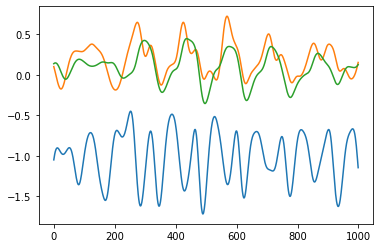

Gyroscope for activity9


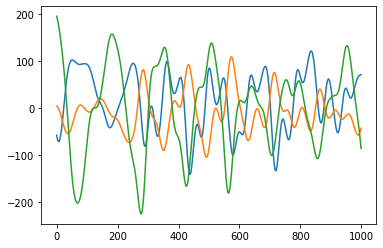

Accelerometer for activity10


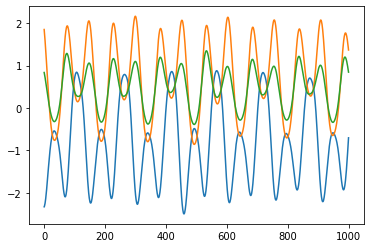

Gyroscope for activity10


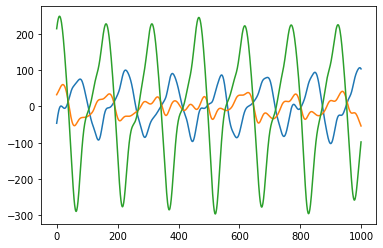

Accelerometer for activity11


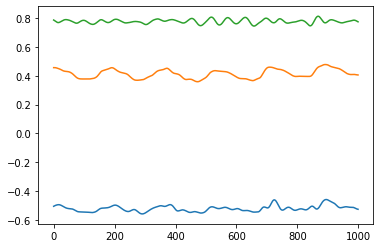

Gyroscope for activity11


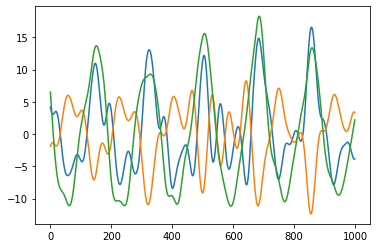

Accelerometer for activity12


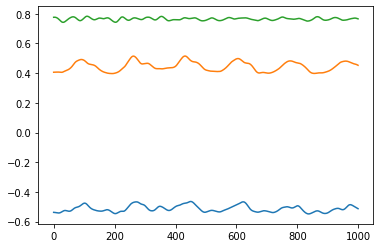

Gyroscope for activity12


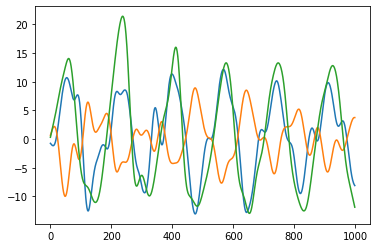

Accelerometer for activity13


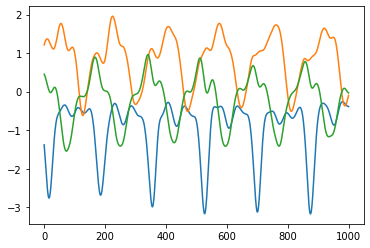

Gyroscope for activity13


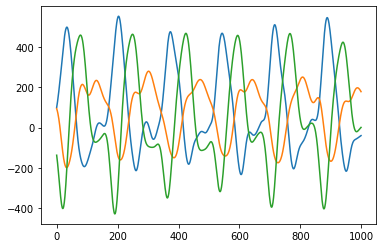

In [120]:
noise_removing()

## Feature Engineering - task 2

In [50]:
# Print out features for all 19 sets of data 
def create_features():
    b, a = signal.butter(4, 0.04, 'low', analog=False) # create a butterworth low pass filter

    for i in range(19): #read all 19 datasets
            df = pd.read_csv('dataset_' + str(i + 1) + '.txt', sep=',', header=None)
            print("") # used only to place a space between datasets 
            print('deal with dataset ' + str(i + 1))

            for c in range(1, 14): #seperate each activity in each dataset
                print("Activity" + str(c))
                Activity_data = df[df[24] == c].values

                for j in range (24): # clean data of each sensor 
                    Activity_data[:,i] = signal.lfilter(b, a, Activity_data[:, i])

                #create features
                minVal = np.min(Activity_data[:, c])
                maxVal = np.max(Activity_data[:, c])
                meanVal = np.mean(Activity_data[:, c])
                medianVal = np.median(Activity_data[:, c])

                print("minVal = " + str(minVal) + ", maxVal = " + str(maxVal) +  ", meanVal = " + str(meanVal)
                      +  ", medianVal = " + str(medianVal))

In [37]:
create_features()


deal with dataset 1
Activity1
minVal = 0.14400000000000002, maxVal = 2.6731, meanVal = 0.9494843344182261, medianVal = 0.94963
Activity2
minVal = 0.22715, maxVal = 1.6117, meanVal = 0.6148484115875986, medianVal = 0.61107
Activity3
minVal = -22.149, maxVal = 10.806, meanVal = 0.666524806737733, medianVal = 0.55305
Activity4
minVal = -208.05, maxVal = 217.07, meanVal = -0.015557020506143762, medianVal = 0.30105
Activity5
minVal = -173.63, maxVal = 213.04, meanVal = -1.8950887476605092, medianVal = -4.8274
Activity6
minVal = -1.2929, maxVal = 0.8982700000000001, meanVal = 0.08513081552216135, medianVal = 0.10114
Activity7
minVal = -2.1951, maxVal = -0.22421, meanVal = -0.9837465121777744, medianVal = -1.0198
Activity8
minVal = -0.80697, maxVal = 0.42333000000000004, meanVal = -0.02807243489373923, medianVal = -0.0028536
Activity9
minVal = -89.12, maxVal = 65.768, meanVal = 2.878335652548456, medianVal = 2.4211
Activity10
minVal = -223.5, maxVal = 244.46, meanVal = 0.10790717053195323, m

minVal = -37.995, maxVal = 46.955, meanVal = 1.2097999681002563, medianVal = 0.81835
Activity12
minVal = -1.192, maxVal = -0.58086, meanVal = -0.9161783163119992, medianVal = -0.91805
Activity13
minVal = -4.4614, maxVal = 1.4383, meanVal = -0.4161422098621421, medianVal = -0.2506

deal with dataset 8
Activity1
minVal = -1.0865, maxVal = 1.9196, meanVal = -0.06820948806619777, medianVal = -0.12053
Activity2
minVal = -0.37732, maxVal = 1.5749, meanVal = 0.8940446254882155, medianVal = 0.96231
Activity3
minVal = -579.45, maxVal = 409.93, meanVal = -0.3701405462962962, medianVal = -1.2778
Activity4
minVal = -190.11, maxVal = 175.69, meanVal = 0.7787712301647849, medianVal = 0.30105
Activity5
minVal = -175.09, maxVal = 180.82, meanVal = 0.6610948883083506, medianVal = -1.5319
Activity6
minVal = -0.9865799999999999, maxVal = 0.86685, meanVal = 0.11256112754435678, medianVal = 0.14826
Activity7
minVal = -1.5277557638930988, maxVal = -1.0288159221190515e-117, meanVal = -0.9507854163554949, med


deal with dataset 14
Activity1
minVal = 0.52477, maxVal = 0.86145, meanVal = 0.7293745974067551, medianVal = 0.72918
Activity2
minVal = 0.72951, maxVal = 0.87246, meanVal = 0.8009139270892668, medianVal = 0.79894
Activity3
minVal = -51.443000000000005, maxVal = 25.086, meanVal = 0.7953644161445195, medianVal = 0.91922
Activity4
minVal = -133.72, maxVal = 168.01, meanVal = 0.36664831914292634, medianVal = 0.30105
Activity5
minVal = -147.27, maxVal = 191.44, meanVal = -0.1365110729107335, medianVal = -1.5319
Activity6
minVal = -0.68029, maxVal = 0.8001, meanVal = -0.1068985204857286, medianVal = -0.13054000000000002
Activity7
minVal = -2.2718, maxVal = 0.88644, meanVal = -0.9547167154216498, medianVal = -1.0158
Activity8
minVal = -0.79089, maxVal = 1.0505, meanVal = 0.030771826730135485, medianVal = 0.049414
Activity9
minVal = -662.9, maxVal = 478.44, meanVal = 1.5325429139349978, medianVal = 9.7445
Activity10
minVal = -660.7, maxVal = 731.83, meanVal = -0.4587088729758319, medianVal = 

In [138]:
def feature_engineering():
    training = np.empty(shape=(0, 73))
    testing = np.empty(shape=(0, 73))
    
    # declare the butterworth filter 
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    
    # Read dataset from all 19 participants 
    for i in range(19):
        df = pd.read_csv('dataset_' + str(i + 1) + '.txt', sep=',', header=None)
        print('deal with dataset ' + str(i + 1))
        
        # Seperate each activity in each dataset
        for c in range(1, 14): 
                print("Deal with activity" + str(c))
                activity_data = df[df[24] == c].values
                
                # Apply the butterworth filter to each sensor
                for j in range(24):
                    activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])

                    # Seperate the training and testing sets 
                datat_len = len(activity_data)
                training_len = math.floor(datat_len * 0.8) # seperates 80% of data for training and 20% for testing
                training_data = activity_data[:training_len, :]
                testing_data = activity_data[training_len:, :]

                # Data segmentation - create feature sets 
                training_sample_number = training_len // 1000 + 1
                testing_sample_number = (datat_len - training_len) // 1000 + 1
                
                for s in range(training_sample_number):
                    if s < training_sample_number - 1:
                        sample_data = training_data[1000*s:1000*(s + 1), :]
                    else:
                        sample_data = training_data[1000*s:, :]
                
                # For each sensor extract a feature of min, max and mean value then store it in list feature sample
                # Feature sample is then added to training 
                    feature_sample = []
                    for i in range(24):
                        feature_sample.append(np.min(sample_data[:, i]))
                        feature_sample.append(np.max(sample_data[:, i]))
                        feature_sample.append(np.mean(sample_data[:, i]))
                    feature_sample.append(sample_data[0, -1])
                    feature_sample = np.array([feature_sample])
                    training = np.concatenate((training, feature_sample), axis=0)

                for s in range(testing_sample_number):
                    if s < training_sample_number - 1:
                        sample_data = testing_data[1000*s:1000*(s + 1), :]
                    else:
                        sample_data = testing_data[1000*s:, :]
                    
                    # For each sensor extract a feature of min, max and mean value then store it in list feature sample
                    # Feature sample is then added to testing 
                    feature_sample = []
                    for i in range(24):
                        feature_sample.append(np.min(sample_data[:, i]))
                        feature_sample.append(np.max(sample_data[:, i]))
                        feature_sample.append(np.mean(sample_data[:, i]))
                    feature_sample.append(sample_data[0, -1])
                    feature_sample = np.array([feature_sample])
                    testing = np.concatenate((testing, feature_sample), axis=0)

    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)
                

                

In [139]:
feature_engineering()

deal with dataset 1
Deal with activity1
Deal with activity2
Deal with activity3
Deal with activity4
Deal with activity5
Deal with activity6
Deal with activity7
Deal with activity8
Deal with activity9
Deal with activity10
Deal with activity11
Deal with activity12
Deal with activity13
deal with dataset 2
Deal with activity1
Deal with activity2
Deal with activity3
Deal with activity4
Deal with activity5
Deal with activity6
Deal with activity7
Deal with activity8
Deal with activity9
Deal with activity10
Deal with activity11
Deal with activity12
Deal with activity13
deal with dataset 3
Deal with activity1
Deal with activity2
Deal with activity3
Deal with activity4
Deal with activity5
Deal with activity6
Deal with activity7
Deal with activity8
Deal with activity9
Deal with activity10
Deal with activity11
Deal with activity12
Deal with activity13
deal with dataset 4
Deal with activity1
Deal with activity2
Deal with activity3
Deal with activity4
Deal with activity5
Deal with activity6
Deal wit

In [140]:
zz = pd.read_csv('training_data.csv', sep=',', header=None)
zz.head()

0         1         2         3         4         5         6   \
0 -0.816569  0.108664 -0.226076  0.000002  1.443393  0.927937 -0.065288   
1 -0.217447 -0.198166 -0.206716  0.943449  0.954813  0.949051  0.243267   
2 -0.211469 -0.197433 -0.203718  0.944969  0.955278  0.949762  0.245285   
3 -0.213779 -0.196743 -0.205430  0.944102  0.955904  0.950064  0.245366   
4 -0.215321 -0.197745 -0.205251  0.945593  0.955816  0.950407  0.245322   

         7         8           9   ...         63         64        65  \
0  0.419068  0.222570 -170.282327  ... -55.170616  31.401154 -8.955628   
1  0.260781  0.251630    0.119608  ...  -8.265413  -7.463545 -7.855515   
2  0.255684  0.251104    0.224533  ...  -8.224574  -7.463536 -7.797145   
3  0.256772  0.252069    0.127256  ...  -8.154258  -7.413360 -7.727807   
4  0.259100  0.252390    0.130987  ...  -8.249071  -7.370738 -7.756666   

          66         67        68         69         70        71   72  
0 -13.700559  35.874019  6.926723 -18.405557  48.937208 -2.949775  1.0  
1   5.987726   6.838815  6.408531  -5.105384  -4.365510 -4.755980  1.0  
2   6.089990   6.877332  6.418028  -5.139920  -4.267236 -4.727582  1.0  
3   6.087055   6.975519  6.506448  -5.064112  -4.378773 -4.737936  1.0  
4   6.020695   6.939519  6.395726  -5.161874  -4.427301 -4.752851  1.0  

[5 rows x 73 columns]